<a href="https://colab.research.google.com/github/NBK-code/Demonstrations/blob/main/Image_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. We will download flowers data set that has 5 classes.
2. Build a model to predict the class.
3. Do data augmentation to reduce overfitting.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='/content/sample_data', untar=True)

228827136/228813984 [==============================] - 1s 0us/step


In [3]:
data_dir

'/content/sample_data/datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/sample_data/datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/sample_data/datasets/flower_photos/roses/9433167170_fa056d3175.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/6158504080_b844a9ae05.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/17158274118_00ec99a23c.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/7525783408_0999483bf4_m.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/2225411981_6638c3e988.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/content/sample_data/datasets/flower_photos/roses/9433167170_fa056d3175.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/6158504080_b844a9ae05.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/17158274118_00ec99a23c.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/7525783408_0999483bf4_m.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/2225411981_6638c3e988.jpg')]

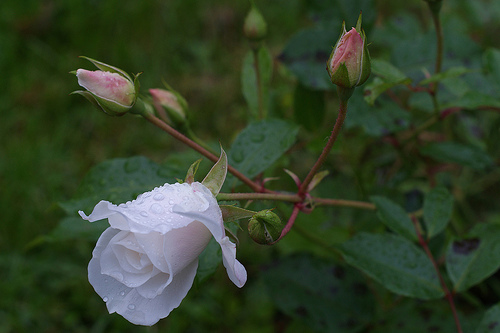

In [8]:
PIL.Image.open(str(roses[1]))


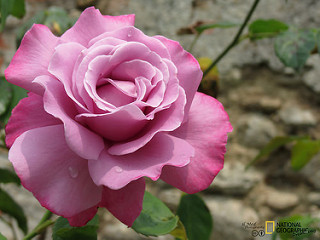

In [9]:
PIL.Image.open(str(roses[10]))

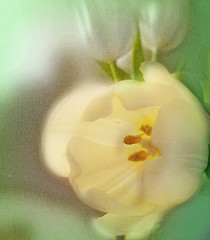

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('/content/sample_data/datasets/flower_photos/roses/9433167170_fa056d3175.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/6158504080_b844a9ae05.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/17158274118_00ec99a23c.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/7525783408_0999483bf4_m.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/2225411981_6638c3e988.jpg')]

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(333, 500, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
X.shape

(3670, 180, 180, 3)

In [20]:
y.shape

(3670,)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [23]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=8)    

Epoch 1/8
86/86 [==============================] - 13s 21ms/step - loss: 1.3051 - accuracy: 0.4404
Epoch 2/8
86/86 [==============================] - 2s 21ms/step - loss: 1.0067 - accuracy: 0.6050
Epoch 3/8
86/86 [==============================] - 2s 21ms/step - loss: 0.8457 - accuracy: 0.6770
Epoch 4/8
86/86 [==============================] - 2s 21ms/step - loss: 0.6146 - accuracy: 0.7820
Epoch 5/8
86/86 [==============================] - 2s 21ms/step - loss: 0.3940 - accuracy: 0.8619
Epoch 6/8
86/86 [==============================] - 2s 21ms/step - loss: 0.2060 - accuracy: 0.9335
Epoch 7/8
86/86 [==============================] - 2s 21ms/step - loss: 0.1041 - accuracy: 0.9648
Epoch 8/8
86/86 [==============================] - 2s 21ms/step - loss: 0.0750 - accuracy: 0.9771


In [25]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 17ms/step - loss: 1.6594 - accuracy: 0.6242


[1.6593515872955322, 0.6241829991340637]

In [26]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

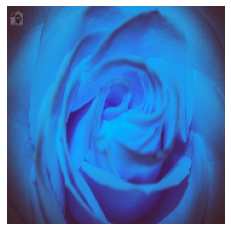

In [27]:
plt.axis('off')
plt.imshow(X[0])

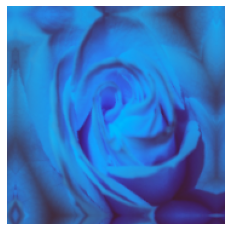

In [29]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [30]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=8)

Epoch 1/8
86/86 [==============================] - 3s 24ms/step - loss: 1.3508 - accuracy: 0.4211
Epoch 2/8
86/86 [==============================] - 2s 23ms/step - loss: 1.0284 - accuracy: 0.5912
Epoch 3/8
86/86 [==============================] - 2s 24ms/step - loss: 0.9200 - accuracy: 0.6450
Epoch 4/8
86/86 [==============================] - 2s 23ms/step - loss: 0.8455 - accuracy: 0.6701
Epoch 5/8
86/86 [==============================] - 2s 24ms/step - loss: 0.8325 - accuracy: 0.6777
Epoch 6/8
86/86 [==============================] - 2s 24ms/step - loss: 0.7686 - accuracy: 0.7082
Epoch 7/8
86/86 [==============================] - 2s 24ms/step - loss: 0.7139 - accuracy: 0.7318
Epoch 8/8
86/86 [==============================] - 2s 24ms/step - loss: 0.6975 - accuracy: 0.7369


In [32]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 13ms/step - loss: 0.6976 - accuracy: 0.7266


[0.697565495967865, 0.7265795469284058]